<a href="https://colab.research.google.com/github/Laaliji/Image_processing_and_computer_vision_workshops/blob/main/hands_on_histogram_manipulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

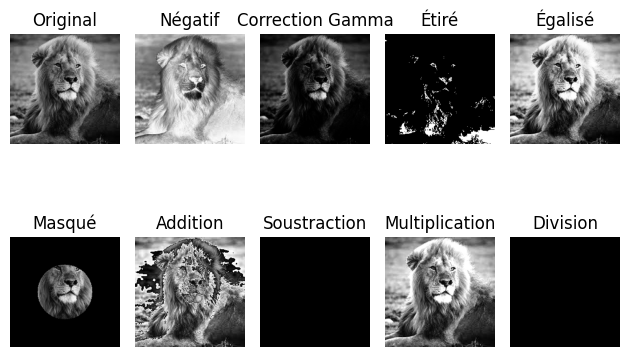

In [1]:
# ====================
# TP - Traitement d'images en Python
# Concepts : Opérations ponctuelles, histogramme, opérations logiques et arithmétiques
# ====================

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

# Charger une image en niveaux de gris
image_path = "images.jpg"  # Remplacer par votre image
img = Image.open(image_path).convert("L")
img_np = np.array(img)

# -----------------------------------
# 1. Opérations ponctuelles simples
# -----------------------------------

# a. Inversion (négatif)
neg_img = 255 - img_np

# b. Correction gamma
def gamma_correction(image, gamma):
    normalized = image / 255.0
    corrected = np.power(normalized, gamma)
    return (corrected * 255).astype(np.uint8)

gamma_img = gamma_correction(img_np, 2.2)

# -----------------------------------
# 2. Transformation d’histogramme
# -----------------------------------

# a. Affichage histogramme
def plot_histogram(image, title="Histogramme"):
    plt.hist(image.flatten(), bins=256, range=(0, 255), color='gray')
    plt.title(title)
    plt.xlabel("Niveau de gris")
    plt.ylabel("Nombre de pixels")
    plt.show()

# b. Étirement d’histogramme
def histogram_stretching(image):
    Imin = np.min(image)
    Imax = np.max(image)
    stretched = ((image - Imin) * 255) / (Imax - Imin)
    return stretched.astype(np.uint8)

stretched_img = histogram_stretching(img_np)

# c. Égalisation d’histogramme
equalized_img = ImageOps.equalize(img)

# -----------------------------------
# 3. Opérations logiques
# -----------------------------------

# a. Création d’un masque circulaire (région d’intérêt)
mask = np.zeros_like(img_np)
cx, cy = img_np.shape[1] // 2, img_np.shape[0] // 2
radius = min(cx, cy) // 2
Y, X = np.ogrid[:img_np.shape[0], :img_np.shape[1]]
dist_from_center = (X - cx)**2 + (Y - cy)**2
mask[dist_from_center <= radius**2] = 255

# b. Application du masque avec ET logique
masked_img = np.bitwise_and(img_np, mask)

# -----------------------------------
# 4. Opérations arithmétiques
# -----------------------------------

# Pour les opérations suivantes, on utilise une image secondaire de même taille
img2 = img_np.copy()  # Exemple : image identique pour démonstration

# a. Addition
add_img = np.clip(img_np + img2, 0, 255)

# b. Soustraction
sub_img = np.clip(np.abs(img_np - img2), 0, 255)

# c. Multiplication par un facteur (contraste)
contrast_img = np.clip(img_np * 1.5, 0, 255).astype(np.uint8)

# d. Division (évite division par zéro)
div_img = np.clip(img_np / (img2 + 1), 0, 255).astype(np.uint8)

# -----------------------------------
# Affichage des résultats
# -----------------------------------

titles = [
    "Original", "Négatif", "Correction Gamma",
    "Étiré", "Égalisé", "Masqué", "Addition", "Soustraction", "Multiplication", "Division"
]
images = [
    img_np, neg_img, gamma_img,
    stretched_img, np.array(equalized_img), masked_img,
    add_img, sub_img, contrast_img, div_img
]

for i in range(len(images)):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis("off")
plt.tight_layout()
plt.show()


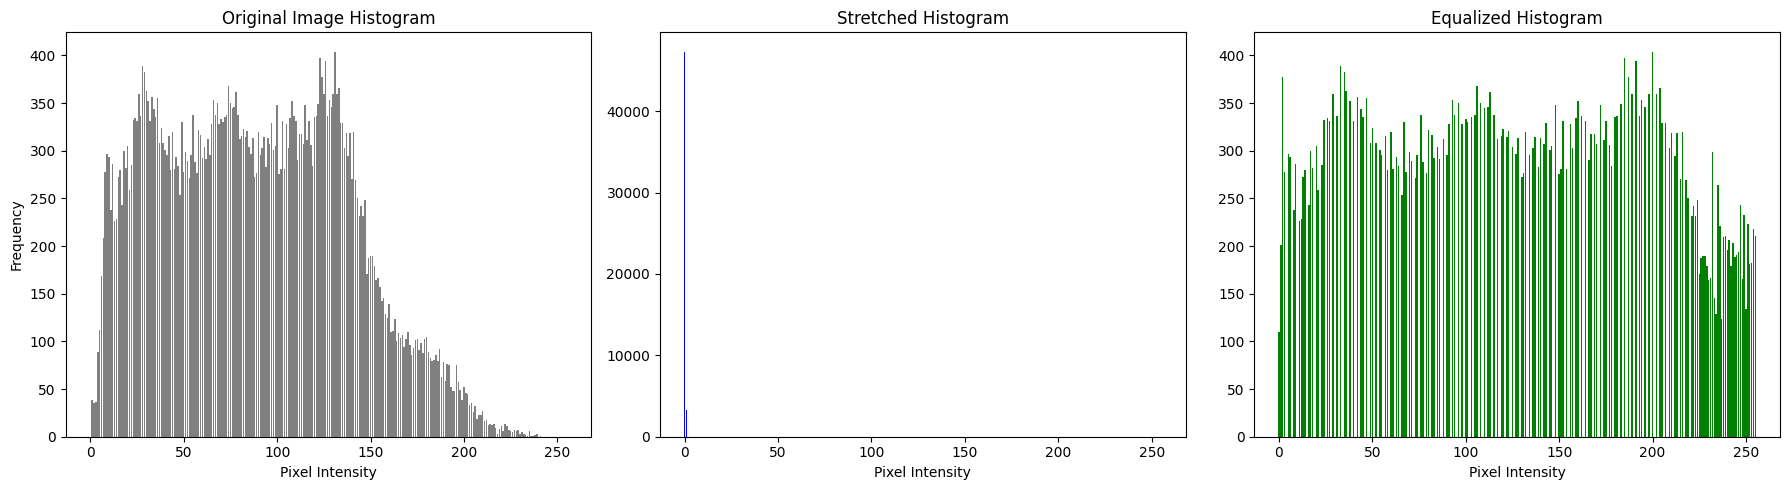

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

# Load the image and convert it to grayscale
image_path = "images.jpg"  # Replace with your image file path
img = Image.open(image_path).convert("L")
img_np = np.array(img)

# 1. Histogram of original image
original_hist = np.histogram(img_np.flatten(), bins=256, range=(0, 255))[0]

# 2. Histogram after stretching
def histogram_stretching(image):
    Imin = np.min(image)
    Imax = np.max(image)
    stretched = ((image - Imin) * 255) / (Imax - Imin)
    return stretched.astype(np.uint8)

stretched_img = histogram_stretching(img_np)
stretched_hist = np.histogram(stretched_img.flatten(), bins=256, range=(0, 255))[0]

# 3. Histogram after equalization
equalized_img = ImageOps.equalize(img)
equalized_np = np.array(equalized_img)
equalized_hist = np.histogram(equalized_np.flatten(), bins=256, range=(0, 255))[0]

# Plot the histograms
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].bar(range(256), original_hist, color='gray')
axes[0].set_title("Original Image Histogram")
axes[0].set_xlabel("Pixel Intensity")
axes[0].set_ylabel("Frequency")

axes[1].bar(range(256), stretched_hist, color='blue')
axes[1].set_title("Stretched Histogram")
axes[1].set_xlabel("Pixel Intensity")

axes[2].bar(range(256), equalized_hist, color='green')
axes[2].set_title("Equalized Histogram")
axes[2].set_xlabel("Pixel Intensity")

plt.tight_layout()
plt.show()
